# Telco Customer Churn — EDA & Data Prep

**Objective:** Explore the IBM Telco Customer Churn dataset and produce a clean, modeling-ready dataset.

**Outputs from this notebook**
- `data/processed/telco_churn_clean.csv` (cleaned dataset)
- A short set of EDA findings


In [1]:
from pathlib import Path
import shutil

RAW_PATH = Path("data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
RAW_PATH.parent.mkdir(parents=True, exist_ok=True)

try:
    from google.colab import files  # type: ignore

    uploaded = files.upload()  # choose the CSV from your computer

    # Prefer the exact expected filename, otherwise fall back to the first uploaded CSV
    if "WA_Fn-UseC_-Telco-Customer-Churn.csv" in uploaded:
        uploaded_name = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
    else:
        csvs = [k for k in uploaded.keys() if k.lower().endswith(".csv")]
        if not csvs:
            raise FileNotFoundError("No .csv file was uploaded. Please upload the Telco churn CSV.")
        uploaded_name = csvs[0]

    src = Path("/content") / uploaded_name
    shutil.move(str(src), str(RAW_PATH))

    print(f"✅ Saved dataset to: {RAW_PATH.resolve()}")
except Exception as e:
    print("ℹ️ If you're NOT running in Colab, place the dataset at:")
    print(f"   {RAW_PATH}")
    print("   (Then re-run this notebook.)")
    print(f"Details: {e}")


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
✅ Saved dataset to: /content/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv


## 0) Setup

In [2]:
# Core
from pathlib import Path

# Data
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt

# Reproducibility / display
np.random.seed(42)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

RAW_PATH = Path("data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
PROCESSED_PATH = Path("data/processed/telco_churn_clean.csv")

print("CWD:", Path.cwd())
print("Raw path:", RAW_PATH.resolve())
print("Processed path:", PROCESSED_PATH.resolve())


CWD: /content
Raw path: /content/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv
Processed path: /content/data/processed/telco_churn_clean.csv


## 1) Load data

In [3]:
if not RAW_PATH.exists():
    raise FileNotFoundError(
        f"Could not find {RAW_PATH}.\n"
        "In Colab: run the upload cell above and upload the CSV.\n"
        "It should be saved to data/raw/ with the exact filename:\n"
        "WA_Fn-UseC_-Telco-Customer-Churn.csv"
    )

df = pd.read_csv(RAW_PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2) Quick audit

In [4]:

print("Shape:", df.shape)
display(df.info())
display(df.describe(include="all").T.head(25))

# Target balance
display(df["Churn"].value_counts(dropna=False))
display(df["Churn"].value_counts(normalize=True).rename("proportion"))


Shape: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,count
Churn,
No,5174
Yes,1869


,proportion
Churn,
No,0.73463
Yes,0.26537


## 3) Data quality checks

In [5]:

# Missingness
missing = df.isna().mean().sort_values(ascending=False)
display(missing[missing > 0].head(20))

# Duplicates (usually none; customerID should be unique)
if "customerID" in df.columns:
    print("Duplicate customerID rows:", df["customerID"].duplicated().sum())

# Check the known issue: TotalCharges sometimes loads as object due to blanks
if "TotalCharges" in df.columns:
    print("TotalCharges dtype:", df["TotalCharges"].dtype)
    display(df["TotalCharges"].head(10))


,0


Duplicate customerID rows: 0
TotalCharges dtype: object


,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
5,820.5
6,1949.4
7,301.9
8,3046.05
9,3487.95


## 4) Cleaning

In [6]:
df_clean = df.copy()

# Standardize target
df_clean["Churn"] = df_clean["Churn"].map({"Yes": 1, "No": 0}).astype("int64")

# Convert TotalCharges to numeric (common blanks -> NaN)
if "TotalCharges" in df_clean.columns:
    df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

# --- Validate + handle missing TotalCharges transparently ---
# In this dataset, TotalCharges may be blank for very new customers.
# We'll (1) inspect those rows and (2) impute in a way consistent with tenure.
if {"TotalCharges", "tenure", "MonthlyCharges"}.issubset(df_clean.columns):
    mask = df_clean["TotalCharges"].isna()
    n_missing = int(mask.sum())
    print("Missing TotalCharges rows:", n_missing)

    if n_missing > 0:
        # Evidence check: are these mostly tenure == 0?
        missing_rows = df_clean.loc[mask, ["tenure", "MonthlyCharges", "TotalCharges"]]
        display(missing_rows.head())

        print("Tenure summary for missing TotalCharges:")
        display(missing_rows["tenure"].describe())

        share_tenure_zero = float((missing_rows["tenure"] == 0).mean())
        print(f"Share of missing TotalCharges rows with tenure==0: {share_tenure_zero:.2%}")

        # Imputation rule:
        # - If tenure == 0, TotalCharges should be 0.
        # - Otherwise, approximate TotalCharges as MonthlyCharges * tenure (simple, evidence-based fallback).
        df_clean.loc[mask & (df_clean["tenure"] == 0), "TotalCharges"] = 0.0
        df_clean.loc[mask & (df_clean["tenure"] > 0), "TotalCharges"] = (
            df_clean.loc[mask & (df_clean["tenure"] > 0), "MonthlyCharges"]
            * df_clean.loc[mask & (df_clean["tenure"] > 0), "tenure"]
        )

# Drop identifier column from modeling data (keep it if you want it for reporting)
ID_COLS = ["customerID"]
for c in ID_COLS:
    if c in df_clean.columns:
        df_clean.drop(columns=[c], inplace=True)

# Final check
display(df_clean.isna().mean().sort_values(ascending=False).head(10))
print("Shape after cleaning:", df_clean.shape)
df_clean.head()

Missing TotalCharges rows: 11


,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN


Tenure summary for missing TotalCharges:


,tenure
count,11.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Share of missing TotalCharges rows with tenure==0: 100.00%


,0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0
OnlineBackup,0.0


Shape after cleaning: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## 5) EDA — distributions and churn relationships

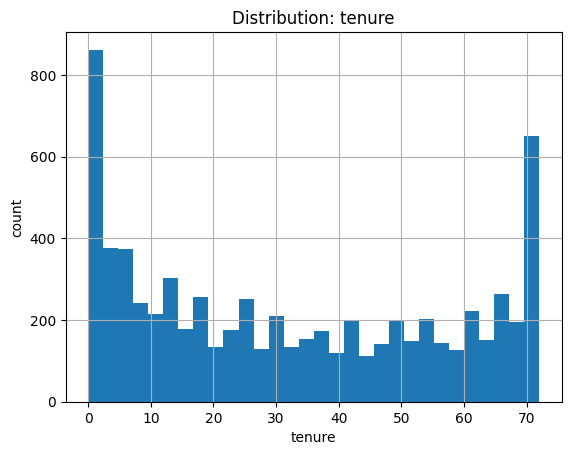

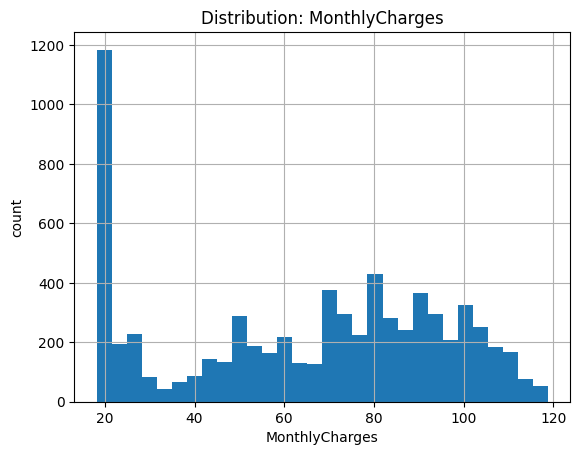

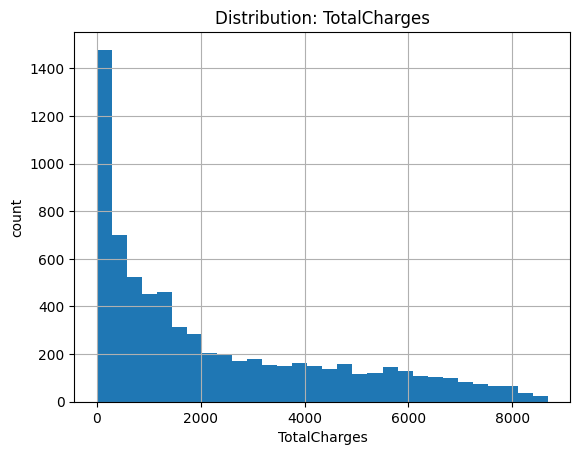

,Contract,churn_rate,n
0,Month-to-month,0.427097,3875
1,One year,0.112695,1473
2,Two year,0.028319,1695


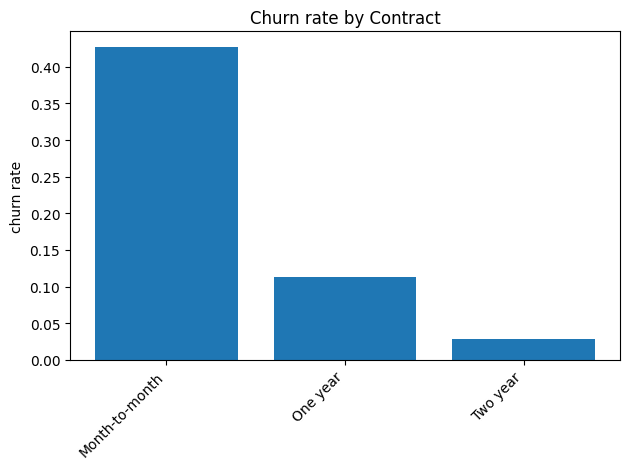

,InternetService,churn_rate,n
0,Fiber optic,0.418928,3096
1,DSL,0.189591,2421
2,No,0.074050,1526


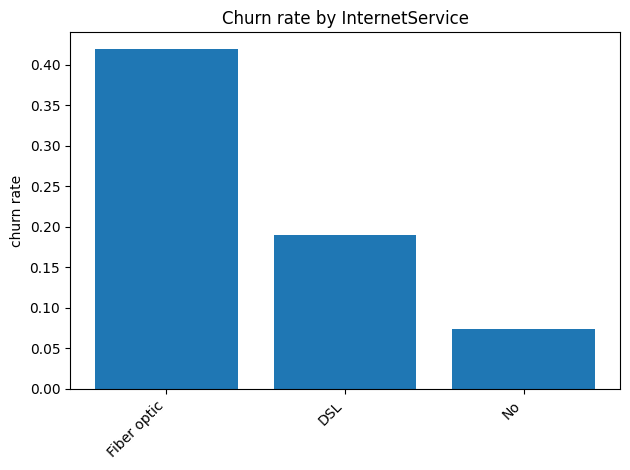

,PaymentMethod,churn_rate,n
0,Electronic check,0.452854,2365
1,Mailed check,0.191067,1612
2,Bank transfer (automatic),0.167098,1544
3,Credit card (automatic),0.152431,1522


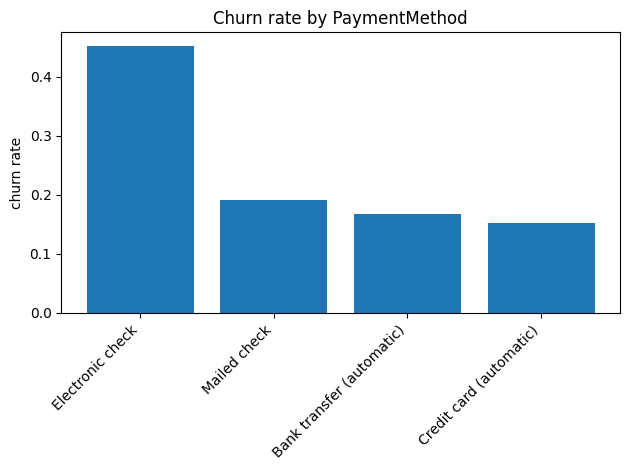

,PaperlessBilling,churn_rate,n
0,Yes,0.335651,4171
1,No,0.163301,2872


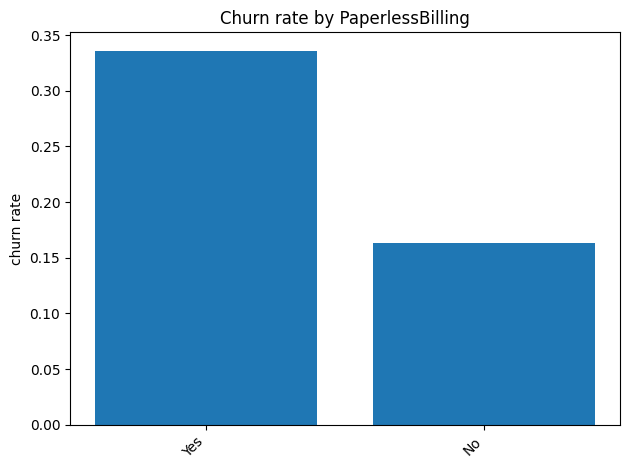

,TechSupport,churn_rate,n
0,No,0.416355,3473
1,Yes,0.151663,2044
2,No internet service,0.074050,1526


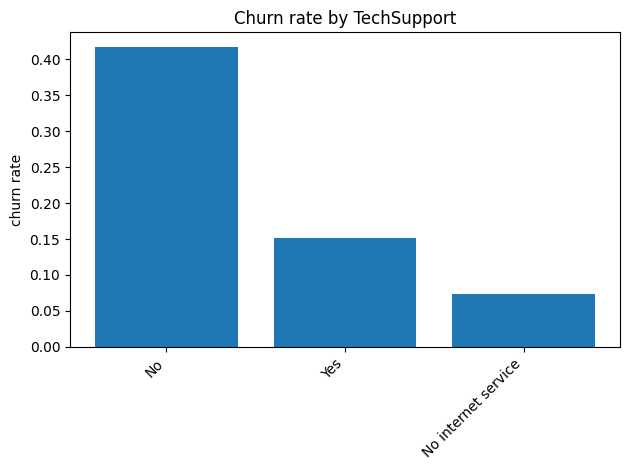

,OnlineSecurity,churn_rate,n
0,No,0.417667,3498
1,Yes,0.146112,2019
2,No internet service,0.074050,1526


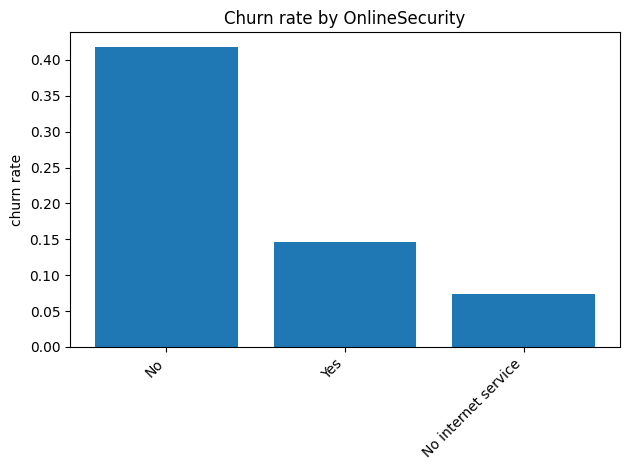

,SeniorCitizen,churn_rate,n
0,1,0.416813,1142
1,0,0.236062,5901


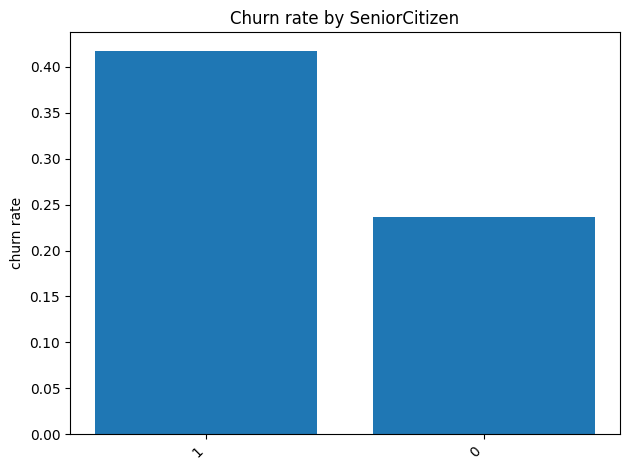

In [7]:

# Helper for churn rate by category
def churn_rate_by(col: str, data: pd.DataFrame) -> pd.DataFrame:
    out = (
        data.groupby(col)["Churn"]
        .agg(churn_rate="mean", n="size")
        .sort_values("churn_rate", ascending=False)
        .reset_index()
    )
    return out

# Basic numeric distributions
num_cols = [c for c in ["tenure", "MonthlyCharges", "TotalCharges"] if c in df_clean.columns]

for c in num_cols:
    plt.figure()
    df_clean[c].hist(bins=30)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("count")
    plt.show()

# Churn rate by key categorical columns (common drivers)
cat_cols = [
    "Contract",
    "InternetService",
    "PaymentMethod",
    "PaperlessBilling",
    "TechSupport",
    "OnlineSecurity",
    "SeniorCitizen",
]

for c in [x for x in cat_cols if x in df_clean.columns]:
    summary = churn_rate_by(c, df_clean)
    display(summary)

    plt.figure()
    plt.bar(summary[c].astype(str), summary["churn_rate"])
    plt.title(f"Churn rate by {c}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("churn rate")
    plt.tight_layout()
    plt.show()


## 6) Light feature engineering (optional but helpful)

In [8]:

df_fe = df_clean.copy()

# Tenure buckets can help interpretability (and sometimes improves simple models)
if "tenure" in df_fe.columns:
    df_fe["tenure_bucket"] = pd.cut(
        df_fe["tenure"],
        bins=[-1, 0, 12, 24, 48, 72],
        labels=["0", "1-12", "13-24", "25-48", "49-72"],
    )

# Example: flag high monthly charges (choose a transparent cutoff like the 75th percentile)
if "MonthlyCharges" in df_fe.columns:
    cutoff = float(df_fe["MonthlyCharges"].quantile(0.75))
    df_fe["high_monthly_charges"] = (df_fe["MonthlyCharges"] >= cutoff).astype(int)
    print("High MonthlyCharges cutoff (75th pct):", cutoff)

df_fe.head()


High MonthlyCharges cutoff (75th pct): 89.85


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bucket,high_monthly_charges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-48,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,25-48,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12,0


## 7) Save processed data

In [9]:

PROCESSED_PATH.parent.mkdir(parents=True, exist_ok=True)
df_fe.to_csv(PROCESSED_PATH, index=False)
print("Saved:", PROCESSED_PATH, "with shape", df_fe.shape)


Saved: data/processed/telco_churn_clean.csv with shape (7043, 22)
